Reference:
1. Online notes from UConn https://www.phys.uconn.edu/~rozman/Courses/P2400_17S/downloads/laplace-method-integrals.pdf (Laplace method) and https://www.phys.uconn.edu/~rozman/Courses/P2400_17S/downloads/stationary-phase.pdf (Stationary Phase)
2. Bender & Orszag (1999) Advanced Mathematical Methods for Sci & Eng Ch.6

In [5]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

## Bessel function of first kind $J_0(x)$
The function $J_0$ is defined as:
$$
\frac{1}{\pi} \int_{-\pi/2}^{\pi/2} \cos(x\cos(\theta))d\theta \sim \sqrt{\frac{2}{\pi x}} \cos\left(x-\frac{\pi}{4}\right) \quad \text{when }x \gg 1
$$

In [6]:
J0 = lambda x: special.jv(0,x)

In [31]:
def envelope(x):
    return np.sqrt(2/(np.pi*x))

In [32]:
def approx(x):
    return envelope(x)*np.cos(x-np.pi/4)

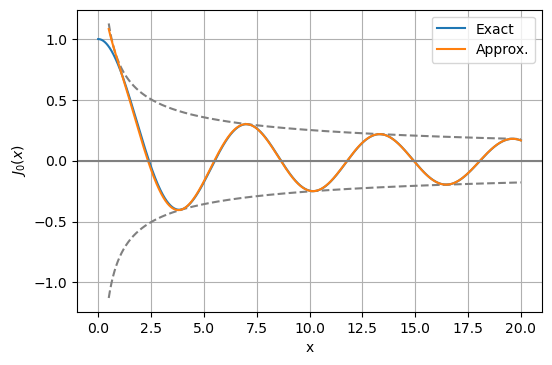

In [71]:
x = np.linspace(0,20,10000)
xx = np.linspace(0.5,20,10000)
plt.plot(x,J0(x),label=r'Exact')
plt.plot(xx,envelope(xx),color='grey',ls='--')
plt.plot(xx,-envalope(xx),color='grey',ls='--')
plt.plot(xx,approx(xx),label='Approx.')
plt.xlabel('x')
plt.ylabel(r'$J_0(x)$')
plt.axhline(0,color='grey')
plt.grid()
plt.legend()
plt.gcf().set_dpi(100)

/tmp/ipykernel_500/3564397798.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(2/(np.pi*x))


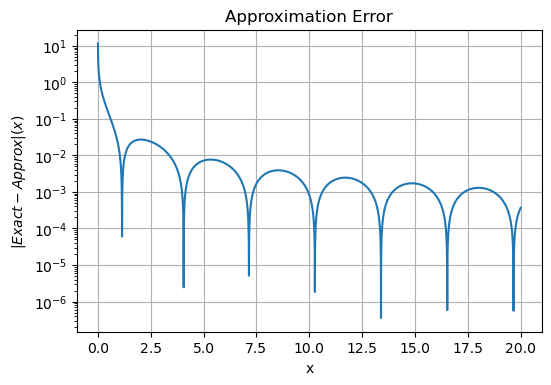

In [72]:
plt.plot(x,np.abs(approx(x)-J0(x)))
plt.yscale('log')
plt.ylabel(r'$|Exact-Approx|(x)$')
plt.grid()
plt.xlabel('x')
plt.title('Approximation Error')
plt.gcf().set_dpi(100)

## Stationary phase derivations

There is a useful result
$$
\int_0^\infty e^{\pm i\lambda u^p} du = e^{\pm\frac{\pi}{2p}} \lambda^{-\frac{1}{p}} \Gamma\left(\frac{1}{p}+1\right)
$$

We can apply this to the lensing integral, which is propotional to:
$$
F(f) \propto \frac{f}{i} = \int d^{2}\vec x \exp\left(2\pi i f t_d(\vec x, \vec y)\right)
$$

By method of stationary phase, we can write:

\begin{align*}
F(f) &\propto \frac{f}{i} \int d^{2}\vec x \exp\left(2\pi i f \left[t_d(\vec x_0, \vec y_0) + \frac{1}{2} \left(\lambda_1 x^2 + \lambda_2 y^2 \right)\right]\right)\\
& =\frac{f}{i} e^{2\pi f i t_d(\vec x_0, \vec y)} \left(\int_\mathbb{R} e^{i\pi f \lambda_1 x_1^2 }dx_1\right) 
\left(\int_\mathbb{R} e^{i\pi f \lambda_2 x_2^2 }dx_2\right) \\
&= \frac{f}{i} e^{2\pi f i t_d(\vec x_0, \vec y)}  \frac{e^{i\frac{\pi}{4}\text{sgn}(\lambda_1)}}{\sqrt{f |\lambda_1|}}
\frac{e^{i\frac{\pi}{4}\text{sgn}(\lambda_2)}}{\sqrt{f |\lambda_2|}}\\
&= \frac{e^{2\pi f i t_d(\vec x_0, \vec y)-i\pi n}}{\det(\text{Hess}_{\vec x}(t_d))}
\end{align*}
where $n$ is 0,1/2,1 when it is minimum, saddle point, and maximum respectively. Also note that $\lambda_1, \lambda_2$ are functions of $\vec y$

Now the Hessian matrix is related to the magnification tensor because of the implicit function theorem. Let $F(\vec x, \vec y) = \nabla_{\vec x} t_d(\vec x, \vec y)$ be a function that maps $\mathbb{R}^2 \times \mathbb{R}^2 \to \mathbb{R}^2$. The lens equation states that $F(\vec x, \vec y)=0$ at image location. Hence by implicit function theorem:
$$
\frac{\partial F}{\partial \vec x} + \frac{\partial F}{\partial \vec y} \frac{\partial \vec y}{\partial \vec x} = 0
$$
Since $F=(\partial t_d/\partial x_1, \partial t_d/\partial x_2)$, the first term $\partial F/\partial \vec x$ is the Hessian of $t_d$ wrt to $\vec x$. On the other hand, because $t_d = \frac{1}{2}|\vec x -\vec y|^2 - \psi(\vec x) + \phi(\vec y)$, the only term that will contribute to $\partial F/\partial \vec y$ is $\frac{1}{2}|\vec x -\vec y|^2$. In can be easily verify that:
$$
\frac{\partial F}{\partial \vec y} = \begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix} = - I
$$
Therefore, $$\frac{\partial \vec y}{\partial \vec x} = \text{Hess}_{\vec x} (t_d)$$

which is the results in Takahashi et. al.